In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,recall_score

### Data Loading & Analysis

In [51]:
data=pd.read_csv("C:/Users/User/Desktop/Sleep_health_and_lifestyle_dataset.csv")
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [52]:
data.shape

(374, 13)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


1. From the info of the data we can see that the columns "Gender","Occupation","BMI Category","Blood Pressure","Sleep Disoder" needs to be encoded to for further process.

In [54]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [55]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [56]:
data.dropna(inplace=True)

In [57]:
data.shape

(155, 13)

In [58]:
numerical_col=data.select_dtypes(include=['int','float'])

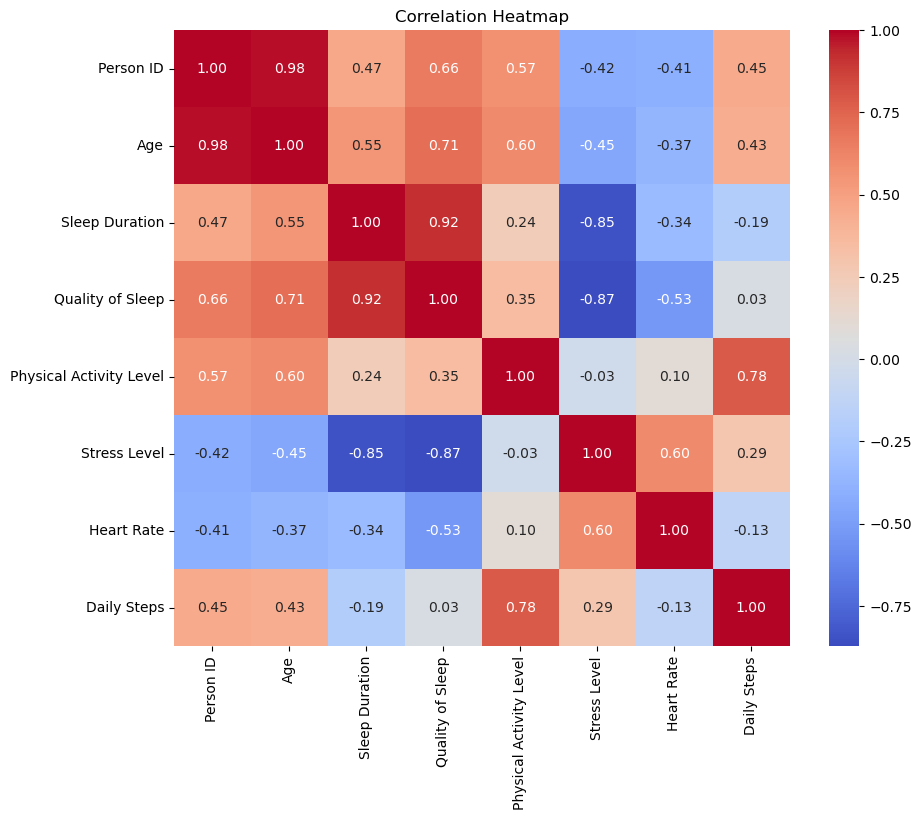

In [59]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

1. People with better and longer sleep tend to be less stressed.
2. High stress correlates with higher heart rates and poorer sleep.
3. Physically active individuals (more daily steps) show better overall activity levels but not necessarily lower stress.
4. Person ID should be removed before modeling since it adds no real information

In [60]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [61]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

### Preprocessing

In [62]:
data_encoded = data.copy()
encoder=OrdinalEncoder()
cat_cols = ['Gender', 'BMI Category', 'Occupation', 'Blood Pressure', 'Sleep Disorder']
data_encoded[cat_cols] = encoder.fit_transform(data_encoded[cat_cols])
print("\nEncoded DataFrame (first 5 rows):\n", data_encoded.head())
print("\nCategory Mappings:")
for col, categories in zip(cat_cols, encoder.categories_):
    print(f"{col}: {list(categories)}")


Encoded DataFrame (first 5 rows):
     Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
3           4     1.0   28         5.0             5.9                 4   
4           5     1.0   28         5.0             5.9                 4   
5           6     1.0   28         8.0             5.9                 4   
6           7     1.0   29         9.0             6.3                 6   
16         17     0.0   29         4.0             6.5                 5   

    Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
3                        30             8           2.0            11.0   
4                        30             8           2.0            11.0   
5                        30             8           2.0            11.0   
6                        40             7           2.0            11.0   
16                       40             7           1.0             7.0   

    Heart Rate  Daily Steps  Sleep Disorder  
3         

In [63]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                155 non-null    int64  
 1   Gender                   155 non-null    float64
 2   Age                      155 non-null    int64  
 3   Occupation               155 non-null    float64
 4   Sleep Duration           155 non-null    float64
 5   Quality of Sleep         155 non-null    int64  
 6   Physical Activity Level  155 non-null    int64  
 7   Stress Level             155 non-null    int64  
 8   BMI Category             155 non-null    float64
 9   Blood Pressure           155 non-null    float64
 10  Heart Rate               155 non-null    int64  
 11  Daily Steps              155 non-null    int64  
 12  Sleep Disorder           155 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 17.0 KB


In [64]:
data1=data_encoded.drop(columns=["Person ID"],axis=1)

In [66]:
X = data_encoded.drop("Sleep Disorder",axis=1)
y = data_encoded['Sleep Disorder']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [121]:
RF = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    random_state=42
)

In [122]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_proba = RF.predict_proba(X_test)

In [123]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8064516129032258
Precision (macro): 0.8083333333333333
Recall (macro): 0.8109243697478992
F1-score (macro): 0.80625

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        14
         1.0       0.87      0.76      0.81        17

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



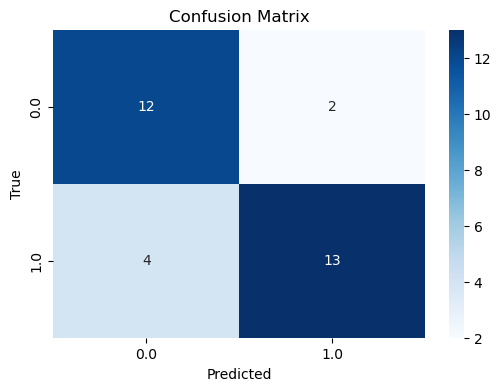

In [124]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=RF.classes_, yticklabels=RF.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

ROC-AUC: 0.9411764705882353


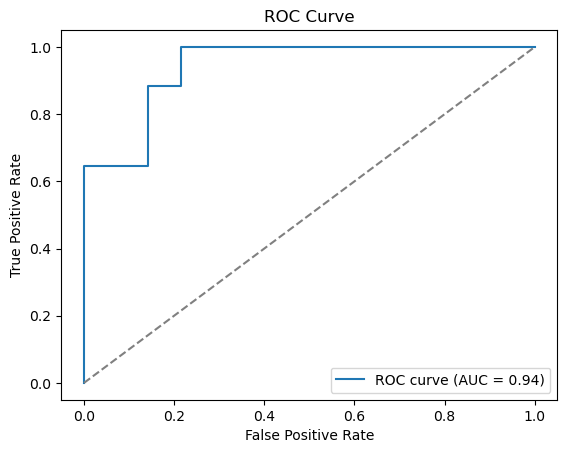

In [125]:
roc_auc = roc_auc_score(y_test, y_proba[:,1])
print("ROC-AUC:", roc_auc)
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [89]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [90]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=300),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=2)

In [91]:
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [92]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300)